In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import numpy as np
import pandas as pd

from sklearn import datasets, ensemble, model_selection

Загружаем dataset digits

In [3]:
digits = datasets.load_digits()

Матрица признаков и вектор ответов

In [4]:
X = digits['data']
y = digits['target']

Размерности матрицы признаков и вектора ответов:

In [5]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Значит у нас есть 1797 образцов рукописного ввода цифр

Визуализация нескольких образцов (взято из https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

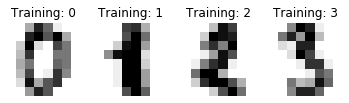

In [6]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Разделяем данные и целевые метки на обучающую и отложенную выборки:

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, shuffle = False)

### 0. Функция для записи ответов в соответствующий файл

In [119]:
def write_ans_file(ans, file_number):
    
    with open("1NN_ans_"+str(file_number)+ ".txt", "w") as fout:
        fout.write(str(ans))

### 1. Метод одного ближайшего соседа

In [11]:
X_train[:1].shape

(1, 64)

Для вычисления расстояния можно воспользоваться соответствующей функцией scipy: `distance.euclidean(a, b)`

In [12]:
from scipy.spatial import distance

In [14]:
distance.euclidean([1, 0, 0], [0, 1, 0])

1.4142135623730951

In [106]:
#возвращает класс ближайшего соседа по евклидовой метрике
def nearest_neigbour(x, X_train, y_train, verbose = False):
    pair_array = np.zeros( (X_train.shape[0], 2) ) #заводим массив для пар по количеству объектов в обуч. выборке
    for X_t, y_t, pair in zip(X_train, y_train, pair_array):
        dst = distance.euclidean(x, X_t) # вычисляем евклидово расстояние
        pair[0] = dst # записываем в пару расстояние и метку класса
        pair[1] = y_t

    sorted_pair_array = pair_array[pair_array[:,0].argsort()] #сортируем массив пар по расстоянию
    
    if verbose: # для отладки
        print(sorted_pair_array[:500])
    
    return sorted_pair_array[:1][0][1]

In [107]:
arr = nearest_neigbour(X[1:2], X_train=X_train, y_train=y_train)

In [108]:
print(arr)

1.0


Для получения доли ошибок классификации используем метод `accuracy` из `sklearn.metrics` (Вычитаем показатель точности из единицы)

In [109]:
from sklearn.metrics import accuracy_score

Вычисляем долю ошибок на отложенной (тестовой) выборке:

In [111]:
predictions = [] 
for x in X_test:
    predictions.append(nearest_neigbour(x, X_train, y_train)) # получаем предсказание для каждого объекта тестовой выборки

In [115]:
ans_1 = 1 - accuracy_score(predictions, y_test) # нам нужна доля ошибки
print(ans_1)

0.0377777777777778


In [120]:
write_ans_file(ans_1, 1)

### 2. RandomForestClassifier

Сравним полученную долю ошибки с долей ошибки случайного леса с параметрами по умолчанию, обученного на 1000 деревьев:

In [122]:
rfc = ensemble.RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
ans_2 = 1 - accuracy_score(rfc.predict(X_test), y_test)
print(ans_2)

0.06222222222222218


In [125]:
write_ans_file(ans_2, 2)

Отчасти разница объясняется особенностью датасета, но это показательный пример, что никогда не стоит забывать о бейзлайнах - иногда легко податься соблазну запустить несколько сложных алгоритмов, получить в них качество 90+%, и верить в то, что задача решена хорошо. При этом же запросто может оказаться, что простые методы дают еще лучший результат.

#### Дополнительно: способ сортировать по выбранной координате массива

In [75]:
arr = np.array([[30, 1], [27, 3], [45, 1]])
print(arr)

[[30  1]
 [27  3]
 [45  1]]


In [80]:
sorted_arr = arr[arr[:,0].argsort()] 
print(sorted_arr)

[[27  3]
 [30  1]
 [45  1]]
